# Practice Exercise: Cleaning data & Transforming columns/features

## Context:
- The data is based on real anonymized Czech bank transactions and account info.
- We'll be focusing on practicing the data cleaning, columns transformations, and other techniques that we've learned in the course. 
- But here is the original task description of the dataset publishers:

*The bank wants to improve their services. For instance, the bank managers have only vague idea, who is a good client (whom to offer some additional services)   and who is a bad client (whom to watch carefully to minimize the bank losses). Fortunately, the bank stores data about their clients, the accounts (transactions within several months), the loans already granted, the credit cards issued. The bank managers hope to improve their understanding of customers and seek specific actions to improve services.*

- We've made minor changes on the data to fit this exercise, such as changing the column names. Check out the original source if you are interested in using this data for other purposes (https://data.world/lpetrocelli/czech-financial-dataset-real-anonymized-transactions)

## Dataset Description:

We'll work on three datasets (in three separate csv files):

  - **account**: each record describes static characteristics of an account
  - **transaction**: each record describes one transaction on an account
  - **district**: each record describes demographic characteristics of a district
  
In reality, the organizations like banks often have data stored in multiple datasets. Assume we want to study the transactional level data, we'll need to combine these three datasets together to have transactions data with account and district data.

## Objective: 
   - Examine/clean the individual dataset
   - Combine them into a single dataset, which is subject to more cleaning
   - Create new columns based on existing columns

By the end, the new dataset is ready for more analysis.

### 1. Import the libraries

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer

### 2. Import the data from three csv files as DataFrames `account`, `district`, `trans`
Hint: 
- the `read_csv` function can automatically infer and load zip file, read its documentation of parameter `compression` if you are interested in details
- you may ignore the warning when reading the `trans.csv.zip` file. It is optional to follow the warning instructions to remove it.

In [2]:
account = pd.read_csv('account.csv')
district = pd.read_csv('district.csv')
trans = pd.read_csv('trans.csv.zip')

/var/folders/1q/9cbgvv293tg7kpdrsjkwhss80000gn/T/ipykernel_6068/3919704612.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  trans = pd.read_csv('trans.csv.zip')


### 3. Look at the info summary, head of each DataFrame

In [3]:
trans.head()

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account
0,695247,2378,1993-01-01,CREDIT,CREDIT IN CASH,700.0,700.0,NaN,NaN,NaN
1,171812,576,1993-01-01,CREDIT,CREDIT IN CASH,900.0,900.0,NaN,NaN,NaN
2,207264,704,1993-01-01,CREDIT,CREDIT IN CASH,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,1993-01-01,CREDIT,CREDIT IN CASH,600.0,600.0,NaN,NaN,NaN
4,579373,1972,1993-01-02,CREDIT,CREDIT IN CASH,400.0,400.0,NaN,NaN,NaN


In [4]:
account.head()

,account_id,district_id,frequency,account_open_date,client_id
0,576,55,MONTHLY STATEMENTS,1993-01-01,692
1,3818,74,MONTHLY STATEMENTS,1993-01-01,4601
2,704,55,MONTHLY STATEMENTS,1993-01-01,844
3,2378,16,MONTHLY STATEMENTS,1993-01-01,2873
4,2632,24,MONTHLY STATEMENTS,1993-01-02,3177


In [5]:
district.head()

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,1,Hl.m. Praha,Prague,1204953,12541.0,0.43,99107.0
1,2,Benesov,central Bohemia,88884,NaN,NaN,2674.0
2,3,Beroun,central Bohemia,75232,8980.0,2.21,2813.0
3,4,Kladno,central Bohemia,149893,9753.0,5.05,NaN
4,5,Kolin,central Bohemia,95616,9307.0,4.43,NaN


In [6]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   trans_id         1056320 non-null  int64  
 1   account_id       1056320 non-null  int64  
 2   date             1056320 non-null  object 
 3   type             1056320 non-null  object 
 4   operation_type   873206 non-null   object 
 5   amount           1056320 non-null  float64
 6   balance          1056320 non-null  float64
 7   description      574439 non-null   object 
 8   partner_bank     273508 non-null   object 
 9   partner_account  295389 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 80.6+ MB


In [7]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   district_id           76 non-null     int64  
 1   district_name         76 non-null     object 
 2   region                76 non-null     object 
 3   population            76 non-null     int64  
 4   average_salary        66 non-null     float64
 5   unemployment_rate     66 non-null     float64
 6   num_committed_crimes  67 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 4.3+ KB


In [8]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   account_id         4500 non-null   int64 
 1   district_id        4500 non-null   int64 
 2   frequency          4500 non-null   object
 3   account_open_date  4500 non-null   object
 4   client_id          4500 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 175.9+ KB


### 4. Check for the unique values and their counts in each column for the three DataFrames

In [9]:
trans.nunique()

trans_id           1056320
account_id            4500
date                  2191
type                     2
operation_type           5
amount               40400
balance             542739
description              8
partner_bank            13
partner_account       7665
dtype: int64

In [10]:
district.nunique()

district_id             76
district_name           76
region                   8
population              76
average_salary          65
unemployment_rate       63
num_committed_crimes    66
dtype: int64

In [11]:
account.nunique()

account_id           4500
district_id            77
frequency               3
account_open_date    1535
client_id            4500
dtype: int64

### 5. Check for duplicates in the three DataFrames

In [12]:
# check for duplicate rows df[df.duplicated()]

In [13]:
account[account.duplicated()]

,account_id,district_id,frequency,account_open_date,client_id


In [14]:
trans[trans.duplicated()]

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account


In [15]:
account[account.duplicated()]

,account_id,district_id,frequency,account_open_date,client_id


In [16]:
#Note all of the dataframes have the same amount of rows listed earlier, therefore there are no duplicates

### 6. Convert column `account_open_date` in `account` and column `date` in `trans` into datetime dtypes

In [17]:
pd.to_datetime(account['account_open_date'])

0      1993-01-01
1      1993-01-01
2      1993-01-01
3      1993-01-01
4      1993-01-02
          ...    
4495   1997-12-28
4496   1997-12-28
4497   1997-12-28
4498   1997-12-29
4499   1997-12-29
Name: account_open_date, Length: 4500, dtype: datetime64[ns]

In [18]:
pd.to_datetime(trans['date'])

0         1993-01-01
1         1993-01-01
2         1993-01-01
3         1993-01-01
4         1993-01-02
             ...    
1056315   1998-12-31
1056316   1998-12-31
1056317   1998-12-31
1056318   1998-12-31
1056319   1998-12-31
Name: date, Length: 1056320, dtype: datetime64[ns]

### 7. Convert the columns `region` and `district_name` in `district` to all uppercase

In [19]:
district.rename(columns={'region': 'REGION', 'district_name': 'DISTRICT_NAME'})

,district_id,DISTRICT_NAME,REGION,population,average_salary,unemployment_rate,num_committed_crimes
0,1,Hl.m. Praha,Prague,1204953,12541.0,0.43,99107.0
1,2,Benesov,central Bohemia,88884,NaN,NaN,2674.0
2,3,Beroun,central Bohemia,75232,8980.0,2.21,2813.0
3,4,Kladno,central Bohemia,149893,9753.0,5.05,NaN
4,5,Kolin,central Bohemia,95616,9307.0,4.43,NaN
...,...,...,...,...,...,...,...
71,72,Olomouc,north Moravia,226122,NaN,4.79,9208.0
72,73,Opava,north Moravia,182027,8746.0,3.74,4433.0
73,74,Ostrava - mesto,north Moravia,323870,10673.0,5.44,18347.0
74,75,Prerov,north Moravia,138032,8819.0,5.66,4505.0


### 8. Check for missing data by columns in `account` using the `isna` method

In [20]:
account.isna().sum()

account_id           0
district_id          0
frequency            0
account_open_date    0
client_id            0
dtype: int64

### 9. Check for missing data by columns in `district` using the `isna` method

In [21]:
district.isna().sum()

district_id              0
district_name            0
region                   0
population               0
average_salary          10
unemployment_rate       10
num_committed_crimes     9
dtype: int64

`district` has numeric features that could have relationships with each other. Let's use iterative imputation on them.

#### Use `IterativeImputer` in `sklearn` to impute based on columns `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes`

##### Import libraries

In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

##### Build a list of columns that will be used for imputation, which are `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes`
These are the columns that might be related to each other 

In [23]:
dtt = ['population', 'average_salary', 'unemployment_rate', 'num_committed_crimes']

##### Create `IterativeImputer` object and set its `min_value` and `max_value` parameters to be the minumum and maximum of corresponding columns

In [24]:
district[dtt].min()

population              42821.00
average_salary           8110.00
unemployment_rate           0.43
num_committed_crimes      888.00
dtype: float64

In [25]:
district[dtt].max()

population              1204953.0
average_salary            12541.0
unemployment_rate             9.4
num_committed_crimes      99107.0
dtype: float64

In [26]:
iter_imp = IterativeImputer(min_value=district[dtt].min(), max_value=district[dtt].max())

##### Apply the imputer to fit and transform the columns to an imputed NumPy array

In [27]:
imputed_num = iter_imp.fit_transform(district[dtt])

##### Assign the imputed array back to the original DataFrame's columns

In [28]:
district[dtt] = imputed_num

##### Double check that the columns are imputed

In [29]:
district.isna().sum()

district_id             0
district_name           0
region                  0
population              0
average_salary          0
unemployment_rate       0
num_committed_crimes    0
dtype: int64

### 10. Check for missing data by columns in `trans` using the `isna` method

In [30]:
trans.isna().sum()

trans_id                0
account_id              0
date                    0
type                    0
operation_type     183114
amount                  0
balance                 0
description        481881
partner_bank       782812
partner_account    760931
dtype: int64

#### Divide the columns into numeric columns and categorical columns, then use the `fillna` method to fill numeric columns with -999, fill categorical columns with 'UNKNOWN'

In [31]:
trans_numeric=trans.select_dtypes(include='number')

In [32]:
numeric_cols=trans_numeric.columns
numeric_cols

Index(['trans_id', 'account_id', 'amount', 'balance', 'partner_account'], dtype='object')

In [33]:
trans[numeric_cols]

,trans_id,account_id,amount,balance,partner_account
0,695247,2378,700.0,700.0,NaN
1,171812,576,900.0,900.0,NaN
2,207264,704,1000.0,1000.0,NaN
3,1117247,3818,600.0,600.0,NaN
4,579373,1972,400.0,400.0,NaN
...,...,...,...,...,...
1056315,3626622,2906,62.3,13729.4,NaN
1056316,3627616,2935,81.3,19544.9,NaN
1056317,3625403,2869,60.2,14638.2,NaN
1056318,3626683,2907,107.5,23453.0,NaN


In [34]:
trans[numeric_cols]=trans[numeric_cols].fillna(-999)

In [35]:
trans[numeric_cols]

,trans_id,account_id,amount,balance,partner_account
0,695247,2378,700.0,700.0,-999.0
1,171812,576,900.0,900.0,-999.0
2,207264,704,1000.0,1000.0,-999.0
3,1117247,3818,600.0,600.0,-999.0
4,579373,1972,400.0,400.0,-999.0
...,...,...,...,...,...
1056315,3626622,2906,62.3,13729.4,-999.0
1056316,3627616,2935,81.3,19544.9,-999.0
1056317,3625403,2869,60.2,14638.2,-999.0
1056318,3626683,2907,107.5,23453.0,-999.0


In [36]:
trans_cat = trans.select_dtypes(exclude='number')
trans_cat

,date,type,operation_type,description,partner_bank
0,1993-01-01,CREDIT,CREDIT IN CASH,NaN,NaN
1,1993-01-01,CREDIT,CREDIT IN CASH,NaN,NaN
2,1993-01-01,CREDIT,CREDIT IN CASH,NaN,NaN
3,1993-01-01,CREDIT,CREDIT IN CASH,NaN,NaN
4,1993-01-02,CREDIT,CREDIT IN CASH,NaN,NaN
...,...,...,...,...,...
1056315,1998-12-31,CREDIT,NaN,INTEREST CREDIT,NaN
1056316,1998-12-31,CREDIT,NaN,INTEREST CREDIT,NaN
1056317,1998-12-31,CREDIT,NaN,INTEREST CREDIT,NaN
1056318,1998-12-31,CREDIT,NaN,INTEREST CREDIT,NaN


In [37]:
cat_cols = trans_cat.columns
cat_cols

Index(['date', 'type', 'operation_type', 'description', 'partner_bank'], dtype='object')

In [40]:
trans[cat_cols].fillna('UNKNOWN')

,date,type,operation_type,description,partner_bank
0,1993-01-01,CREDIT,CREDIT IN CASH,UNKNOWN,UNKNOWN
1,1993-01-01,CREDIT,CREDIT IN CASH,UNKNOWN,UNKNOWN
2,1993-01-01,CREDIT,CREDIT IN CASH,UNKNOWN,UNKNOWN
3,1993-01-01,CREDIT,CREDIT IN CASH,UNKNOWN,UNKNOWN
4,1993-01-02,CREDIT,CREDIT IN CASH,UNKNOWN,UNKNOWN
...,...,...,...,...,...
1056315,1998-12-31,CREDIT,UNKNOWN,INTEREST CREDIT,UNKNOWN
1056316,1998-12-31,CREDIT,UNKNOWN,INTEREST CREDIT,UNKNOWN
1056317,1998-12-31,CREDIT,UNKNOWN,INTEREST CREDIT,UNKNOWN
1056318,1998-12-31,CREDIT,UNKNOWN,INTEREST CREDIT,UNKNOWN


In [41]:
trans[cat_cols]=trans[cat_cols].fillna('UNKNOWN')

In [42]:
trans.isna().sum()

trans_id           0
account_id         0
date               0
type               0
operation_type     0
amount             0
balance            0
description        0
partner_bank       0
partner_account    0
dtype: int64

In [46]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   trans_id         1056320 non-null  int64  
 1   account_id       1056320 non-null  int64  
 2   date             1056320 non-null  object 
 3   type             1056320 non-null  object 
 4   operation_type   1056320 non-null  object 
 5   amount           1056320 non-null  float64
 6   balance          1056320 non-null  float64
 7   description      1056320 non-null  object 
 8   partner_bank     1056320 non-null  object 
 9   partner_account  1056320 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 80.6+ MB


### 11. Check for outliers in `district` using the `describe` method, then look at the histograms of the suspicious columns

In [47]:
district.describe().T

,count,mean,std,min,25%,50%,75%,max
district_id,76.0,38.500000,22.083176,1.00,19.750000,38.500000,57.25000,76.0
population,76.0,133692.000000,137812.665884,42821.00,84725.000000,108391.000000,138277.00000,1204953.0
average_salary,76.0,8983.707247,740.959314,8110.00,8533.750000,8792.984750,9280.75000,12541.0
unemployment_rate,76.0,3.864003,1.721597,0.43,2.650000,3.761936,4.57000,9.4
num_committed_crimes,76.0,5054.492038,11392.279917,888.00,1918.454646,2864.000000,4562.41324,99107.0


#### Explore the outliers in the dataset

Possible outlier columns in district (population, average_salary, num_committed_crimes)\
outlier_high = Q3 + 1.5*IQR\
outlier_low = Q1 - 1.5*IQR\

population IQR = Q3(138277.00000)-Q1(84725.000000)\ 
outlier_high = Q3(138277.00000)+1.5IQR\
outlier_low = (84725.000000) - 1.5*IQR\

average_salary IQR = Q3(9280.75000)-Q1(8533.750000)\
outlier_high = Q3(9280.75000)+1.5IQR\
outlier_low = (8533.750000) - 1.5*IQR\

num_committed_crimes IQR = Q3(4562.41324)-Q1(1918.454646)\ 
outlier_high = Q3(4562.41324)+1.5IQR\
outlier_low = (1918.454646) - 1.5*IQR


In [48]:
population_iqr = (138277.00000)-(84725.000000)
population_iqr

53552.0

In [49]:
population_high = (138277.00000)+1.5*(53552.0)
population_high

218605.0

In [50]:
population_low = (84725.000000) - 1.5*(53552.0)
population_low

4397.0

In [51]:
average_salary_iqr = (9280.75000)-(8533.750000)
average_salary_iqr

747.0

In [52]:
average_salary_high = (9280.75000)+1.5*(747.0)
average_salary_high

10401.25

In [53]:
average_salary_low = (8533.750000) - 1.5*(747.0)
average_salary_low

7413.25

In [54]:
num_committed_crimes_iqr = (4562.41324)-(1918.454646)
num_committed_crimes_iqr

2643.9585939999997

In [55]:
num_committed_crimes_high = (4562.41324)+1.5*(2643.9585939999997)
num_committed_crimes_high

8528.351131

In [56]:
num_committed_crimes_low = (1918.454646) - 1.5*(2643.9585939999997)
num_committed_crimes_low

-2047.4832449999997

In [63]:
unemployment_rate_iqr = (4.57000) - (2.650000)
unemployment_rate_iqr

1.9200000000000004

In [64]:
unemployment_rate_high = (4.57000)+1.5*(1.9200000000000004)
unemployment_rate_high

7.450000000000001

In [65]:
unemployment_rate_low = (2.650000)-1.5*(1.9200000000000004)
unemployment_rate_low

-0.23000000000000087

array([[<Axes: title={'center': 'district_id'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'average_salary'}>,
        <Axes: title={'center': 'unemployment_rate'}>],
       [<Axes: title={'center': 'num_committed_crimes'}>, <Axes: >]],
      dtype=object)

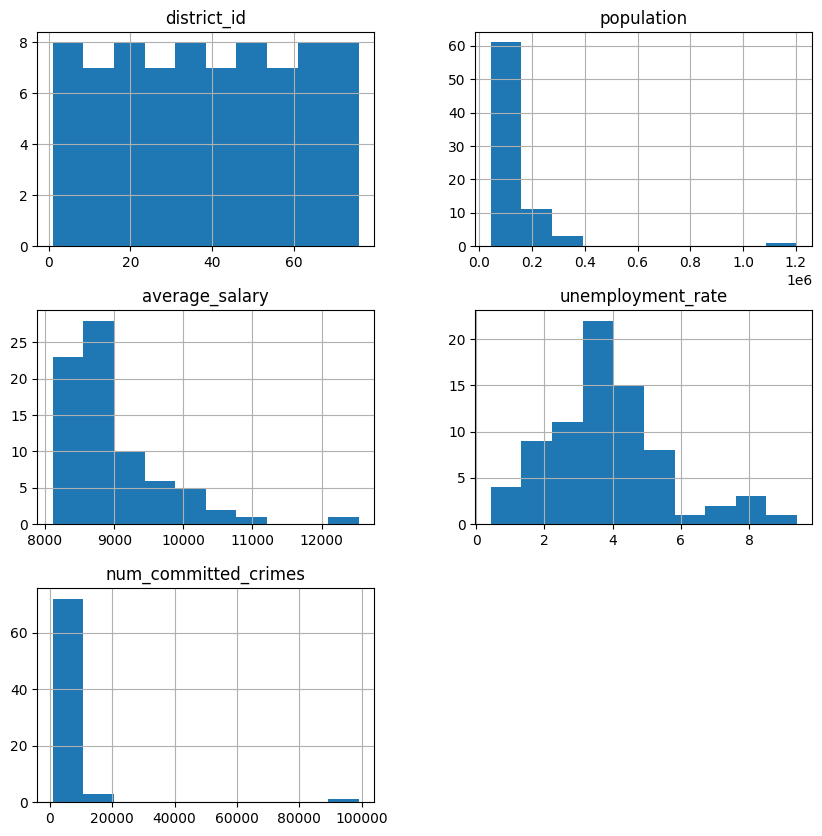

In [57]:
district.hist(figsize=(10,10))

In [58]:
district[district['population'] >= population_high]

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,1,Hl.m. Praha,Prague,1204953.0,12541.000000,0.43,99107.000000
53,54,Brno - mesto,south Moravia,387570.0,9945.418311,1.96,18696.000000
67,68,Frydek - Mistek,north Moravia,228848.0,9893.000000,4.72,12703.935555
69,70,Karvina,north Moravia,285387.0,10177.000000,7.75,10108.000000
71,72,Olomouc,north Moravia,226122.0,9333.878734,4.79,9208.000000
73,74,Ostrava - mesto,north Moravia,323870.0,10673.000000,5.44,18347.000000


In [59]:
district[district['num_committed_crimes'] >= num_committed_crimes_high]

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,1,Hl.m. Praha,Prague,1204953.0,12541.000000,0.43,99107.000000
53,54,Brno - mesto,south Moravia,387570.0,9945.418311,1.96,18696.000000
67,68,Frydek - Mistek,north Moravia,228848.0,9893.000000,4.72,12703.935555
69,70,Karvina,north Moravia,285387.0,10177.000000,7.75,10108.000000
71,72,Olomouc,north Moravia,226122.0,9333.878734,4.79,9208.000000
73,74,Ostrava - mesto,north Moravia,323870.0,10673.000000,5.44,18347.000000


In [60]:
district[district['average_salary'] >= average_salary_high]

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,1,Hl.m. Praha,Prague,1204953.0,12541.0,0.430000,99107.0
25,26,Plzen - mesto,west Bohemia,170449.0,10787.0,4.885392,6261.0
38,39,Most,north Bohemia,119895.0,10446.0,9.400000,4743.0
73,74,Ostrava - mesto,north Moravia,323870.0,10673.0,5.440000,18347.0


In [66]:
#Since district_id "1", "74" appears in 3 of the tables that may display outliers, these rows may be possible outliers
district[district['unemployment_rate'] >= unemployment_rate_high]

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
32,33,Decin,north Bohemia,133777.0,8705.0,7.61,4859.0
33,34,Chomutov,north Bohemia,125236.0,9675.0,7.68,5190.0
38,39,Most,north Bohemia,119895.0,10446.0,9.40,4743.0
69,70,Karvina,north Moravia,285387.0,10177.0,7.75,10108.0


In [83]:
#Since district_id "1", "74" appears in 3 of the DF's that may display outliers, these rows may be possible outliers
#Even as district_id 1 has a much larger population and num_committed_crimes, since the unemployment rate is low, there
#may not be a reason to drop this row
district.loc[[0,73]]

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,1,Hl.m. Praha,Prague,1204953.0,12541.0,0.43,99107.0
73,74,Ostrava - mesto,north Moravia,323870.0,10673.0,5.44,18347.0


### 12. Check for outliers in `trans` using the `describe` method, then look at the histograms of the suspicious columns

In [103]:
trans.describe().T

,count,mean,std,min,25%,50%,75%,max
trans_id,1056320.0,1.335311e+06,1.227487e+06,1.0,430262.75,858506.5,2060979.250,3682987.0
account_id,1056320.0,2.936867e+03,2.477345e+03,1.0,1204.00,2434.0,3660.000,11382.0
amount,1056320.0,5.924146e+03,9.522735e+03,0.0,135.90,2100.0,6800.000,87400.0
balance,1056320.0,3.851833e+04,2.211787e+04,-41125.7,22402.50,33143.4,49603.625,209637.0
partner_account,1056320.0,1.277068e+07,2.613658e+07,-999.0,-999.00,-999.0,3410566.000,99994199.0


array([[<Axes: title={'center': 'trans_id'}>,
        <Axes: title={'center': 'account_id'}>],
       [<Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'balance'}>],
       [<Axes: title={'center': 'partner_account'}>, <Axes: >]],
      dtype=object)

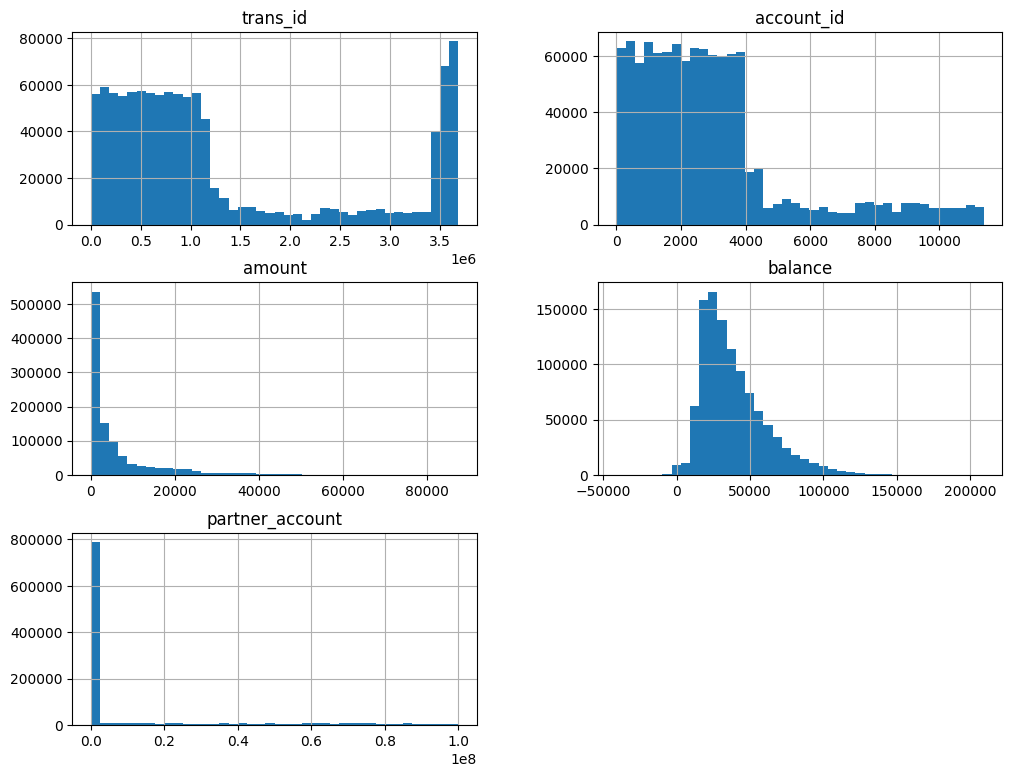

In [104]:
trans.hist(bins = 40, figsize=(12,9))

In [105]:
amount_iqr = (6800.000)-(135.90)
amount_iqr

6664.1

In [106]:
amount_high = (6800.000)+1.5*(6664.1)
amount_high

16796.15

In [107]:
amount_low = (135.90) - 1.5*(6664.1)
amount_low

-9860.250000000002

In [108]:
balance_iqr = (49603.625)-(22402.50)
balance_iqr

27201.125

In [109]:
balance_high = (49603.625)+1.5*(27201.125)
balance_high

90405.3125

In [110]:
balance_low = (22402.50) - 1.5*(27201.125)
balance_low

-18399.1875

In [111]:
partner_account_iqr = (3410566.000)-(-999.00)
partner_account_iqr

3411565.0

In [112]:
partner_account_high = (3410566.000)+1.5*(3411565.0)
partner_account_high

8527913.5

In [113]:
partner_account_low = (-999.00) - 1.5*(3411565.0)
partner_account_low

-5118346.5

#### Explore the outliers in the dataset

In [114]:
trans[trans['amount'] >= amount_high]

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account
42,1117248,3818,1993-01-09,CREDIT,CREDIT IN CASH,17366.0,17966.0,UNKNOWN,UNKNOWN,-999.0
58,207265,704,1993-01-12,CREDIT,CREDIT IN CASH,17477.0,18477.0,UNKNOWN,UNKNOWN,-999.0
73,1548750,5270,1993-01-14,CREDIT,COLLECTION FROM ANOTHER BANK,44749.0,45549.0,UNKNOWN,IJ,80269753.0
76,621775,2122,1993-01-15,CREDIT,CREDIT IN CASH,46552.0,46852.0,UNKNOWN,UNKNOWN,-999.0
80,1027726,3510,1993-01-17,CREDIT,CREDIT IN CASH,23323.0,23823.0,UNKNOWN,UNKNOWN,-999.0
...,...,...,...,...,...,...,...,...,...,...
1051802,1009071,3446,1998-12-30,DEBIT,WITHDRAWAL IN CASH,25500.0,95357.0,UNKNOWN,UNKNOWN,-999.0
1051803,2520380,8316,1998-12-30,CREDIT,CREDIT IN CASH,36712.0,92753.3,UNKNOWN,UNKNOWN,-999.0
1051804,2520673,8316,1998-12-30,DEBIT,WITHDRAWAL IN CASH,21200.0,121376.3,UNKNOWN,UNKNOWN,-999.0
1051806,2520387,8316,1998-12-30,CREDIT,CREDIT IN CASH,49823.0,142576.3,UNKNOWN,UNKNOWN,-999.0


In [116]:
trans[trans['amount'] <= amount_low]

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account


In [118]:
trans[trans['balance'] >= balance_high]

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

The DataFrame `account` doesn't have any columns that could have outliers, so we are not exploring it.

### 13. Merge (left join) `account` and `district` into a new DataFrame called `account_district` using their common columns

In [95]:
account_district = pd.merge(account, district, on='district_id', how='left')
account_district.shape

(4500, 11)

### 14. Check the information summary of `account_district`, any missing data?

In [96]:
account_district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   account_id            4500 non-null   int64  
 1   district_id           4500 non-null   int64  
 2   frequency             4500 non-null   object 
 3   account_open_date     4500 non-null   object 
 4   client_id             4500 non-null   int64  
 5   district_name         4460 non-null   object 
 6   region                4460 non-null   object 
 7   population            4460 non-null   float64
 8   average_salary        4460 non-null   float64
 9   unemployment_rate     4460 non-null   float64
 10  num_committed_crimes  4460 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 386.8+ KB


#### Look at the rows with missing data in `account_district`

In [98]:
account_district.isna().sum()

account_id               0
district_id              0
frequency                0
account_open_date        0
client_id                0
district_name           40
region                  40
population              40
average_salary          40
unemployment_rate       40
num_committed_crimes    40
dtype: int64

In [101]:
mis=account_district.isna().sum(axis=1)>0

In [102]:
account_district[mis]

,account_id,district_id,frequency,account_open_date,client_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
5,1972,77,MONTHLY STATEMENTS,1993-01-02,2397,NaN,NaN,NaN,NaN,NaN,NaN
77,1000,77,MONTHLY STATEMENTS,1993-01-25,1204,NaN,NaN,NaN,NaN,NaN,NaN
308,299,77,MONTHLY STATEMENTS,1993-04-05,364,NaN,NaN,NaN,NaN,NaN,NaN
322,8321,77,MONTHLY STATEMENTS,1993-04-12,10275,NaN,NaN,NaN,NaN,NaN,NaN
394,551,77,MONTHLY STATEMENTS,1993-05-07,664,NaN,NaN,NaN,NaN,NaN,NaN
537,5228,77,STATEMENTS AFTER TRANSACTION,1993-06-23,6317,NaN,NaN,NaN,NaN,NaN,NaN
574,368,77,MONTHLY STATEMENTS,1993-07-06,448,NaN,NaN,NaN,NaN,NaN,NaN
790,3157,77,MONTHLY STATEMENTS,1993-09-10,3817,NaN,NaN,NaN,NaN,NaN,NaN
817,857,77,MONTHLY STATEMENTS,1993-09-16,1032,NaN,NaN,NaN,NaN,NaN,NaN
832,153,77,MONTHLY STATEMENTS,1993-09-19,185,NaN,NaN,NaN,NaN,NaN,NaN


#### Use `SimpleImputer` from `sklearn` to impute the missing data in columns `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes` with their means

In [67]:
simple_imp_mean=SimpleImputer(strategy='mean')

In [68]:
numerical_cols = account_district.select_dtypes(include='number').columns

In [69]:
account_district[numerical_cols].mean()

account_id                2786.067556
district_id                 37.310444
client_id                 3381.096444
population              270325.692377
average_salary            9482.017843
unemployment_rate            3.571654
num_committed_crimes     16486.170933
dtype: float64

In [70]:
imputed_num = simple_imp_mean.fit_transform(account_district[numerical_cols])

In [71]:
account_district[numerical_cols] = imputed_num

#### Use `fillna` method to impute the missing data in columns `district_name` and `region` with 'UNKNOWN'

In [72]:
category_cols = account_district.select_dtypes(exclude='number').columns

In [73]:
account_district[category_cols]

,frequency,account_open_date,district_name,region
0,MONTHLY STATEMENTS,1993-01-01,Brno - venkov,south Moravia
1,MONTHLY STATEMENTS,1993-01-01,Ostrava - mesto,north Moravia
2,MONTHLY STATEMENTS,1993-01-01,Brno - venkov,south Moravia
3,MONTHLY STATEMENTS,1993-01-01,Jindrichuv Hradec,south Bohemia
4,MONTHLY STATEMENTS,1993-01-02,Karlovy Vary,west Bohemia
...,...,...,...,...
4495,MONTHLY STATEMENTS,1997-12-28,Brno - venkov,south Moravia
4496,MONTHLY STATEMENTS,1997-12-28,Kromeriz,south Moravia
4497,MONTHLY STATEMENTS,1997-12-28,Sokolov,west Bohemia
4498,MONTHLY STATEMENTS,1997-12-29,Vyskov,south Moravia


In [74]:
account_district[category_cols].describe()

,frequency,account_open_date,district_name,region
count,4500,4500,4460,4460
unique,3,1535,76,8
top,MONTHLY STATEMENTS,1993-02-08,Hl.m. Praha,south Moravia
freq,4167,13,554,778


In [75]:
account_district[category_cols] = account_district[category_cols].fillna('UNKNOWN')

In [76]:
account_district[category_cols]

,frequency,account_open_date,district_name,region
0,MONTHLY STATEMENTS,1993-01-01,Brno - venkov,south Moravia
1,MONTHLY STATEMENTS,1993-01-01,Ostrava - mesto,north Moravia
2,MONTHLY STATEMENTS,1993-01-01,Brno - venkov,south Moravia
3,MONTHLY STATEMENTS,1993-01-01,Jindrichuv Hradec,south Bohemia
4,MONTHLY STATEMENTS,1993-01-02,Karlovy Vary,west Bohemia
...,...,...,...,...
4495,MONTHLY STATEMENTS,1997-12-28,Brno - venkov,south Moravia
4496,MONTHLY STATEMENTS,1997-12-28,Kromeriz,south Moravia
4497,MONTHLY STATEMENTS,1997-12-28,Sokolov,west Bohemia
4498,MONTHLY STATEMENTS,1997-12-29,Vyskov,south Moravia


In [77]:
account_district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   account_id            4500 non-null   float64
 1   district_id           4500 non-null   float64
 2   frequency             4500 non-null   object 
 3   account_open_date     4500 non-null   object 
 4   client_id             4500 non-null   float64
 5   district_name         4500 non-null   object 
 6   region                4500 non-null   object 
 7   population            4500 non-null   float64
 8   average_salary        4500 non-null   float64
 9   unemployment_rate     4500 non-null   float64
 10  num_committed_crimes  4500 non-null   float64
dtypes: float64(7), object(4)
memory usage: 386.8+ KB


### 15. Merge (left join) `trans` and `account_district` into a new DataFrame called `all_data` using their common columns

In [78]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   trans_id         1056320 non-null  int64  
 1   account_id       1056320 non-null  int64  
 2   date             1056320 non-null  object 
 3   type             1056320 non-null  object 
 4   operation_type   1056320 non-null  object 
 5   amount           1056320 non-null  float64
 6   balance          1056320 non-null  float64
 7   description      1056320 non-null  object 
 8   partner_bank     1056320 non-null  object 
 9   partner_account  1056320 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 80.6+ MB


In [79]:
account_district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   account_id            4500 non-null   float64
 1   district_id           4500 non-null   float64
 2   frequency             4500 non-null   object 
 3   account_open_date     4500 non-null   object 
 4   client_id             4500 non-null   float64
 5   district_name         4500 non-null   object 
 6   region                4500 non-null   object 
 7   population            4500 non-null   float64
 8   average_salary        4500 non-null   float64
 9   unemployment_rate     4500 non-null   float64
 10  num_committed_crimes  4500 non-null   float64
dtypes: float64(7), object(4)
memory usage: 386.8+ KB


In [80]:
all_data = pd.merge(trans, account_district, on='account_id', how='left')

#### Check the information summary of `all_data`

In [81]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   trans_id              1056320 non-null  int64  
 1   account_id            1056320 non-null  int64  
 2   date                  1056320 non-null  object 
 3   type                  1056320 non-null  object 
 4   operation_type        1056320 non-null  object 
 5   amount                1056320 non-null  float64
 6   balance               1056320 non-null  float64
 7   description           1056320 non-null  object 
 8   partner_bank          1056320 non-null  object 
 9   partner_account       1056320 non-null  float64
 10  district_id           1056320 non-null  float64
 11  frequency             1056320 non-null  object 
 12  account_open_date     1056320 non-null  object 
 13  client_id             1056320 non-null  float64
 14  district_name         1056320 non-

### 16. Create a new column `account_open_year` and assign it as the year from column `account_open_date`

In [100]:
pd.to_datetime(all_data['account_open_date'])

0         1993-01-01
1         1993-01-01
2         1993-01-01
3         1993-01-01
4         1993-01-02
             ...    
1056315   1996-09-20
1056316   1995-05-15
1056317   1996-09-27
1056318   1993-09-09
1056319   1993-01-28
Name: account_open_date, Length: 1056320, dtype: datetime64[ns]

In [101]:
all_data['account_open_date']=pd.to_datetime(all_data['account_open_date'])

In [102]:
all_data['account_open_year'] = all_data['account_open_date'].dt.year

In [103]:
all_data.head()

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account,...,frequency,account_open_date,client_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes,account_open_year
0,695247,2378,1993-01-01,CREDIT,CREDIT IN CASH,700.0,700.0,UNKNOWN,UNKNOWN,-999.0,...,MONTHLY STATEMENTS,1993-01-01,2873.0,Jindrichuv Hradec,south Bohemia,93931.000000,8427.000000,1.540000,1913.000000,1993
1,171812,576,1993-01-01,CREDIT,CREDIT IN CASH,900.0,900.0,UNKNOWN,UNKNOWN,-999.0,...,MONTHLY STATEMENTS,1993-01-01,692.0,Brno - venkov,south Moravia,157042.000000,9072.274638,2.430000,3894.000000,1993
2,207264,704,1993-01-01,CREDIT,CREDIT IN CASH,1000.0,1000.0,UNKNOWN,UNKNOWN,-999.0,...,MONTHLY STATEMENTS,1993-01-01,844.0,Brno - venkov,south Moravia,157042.000000,9072.274638,2.430000,3894.000000,1993
3,1117247,3818,1993-01-01,CREDIT,CREDIT IN CASH,600.0,600.0,UNKNOWN,UNKNOWN,-999.0,...,MONTHLY STATEMENTS,1993-01-01,4601.0,Ostrava - mesto,north Moravia,323870.000000,10673.000000,5.440000,18347.000000,1993
4,579373,1972,1993-01-02,CREDIT,CREDIT IN CASH,400.0,400.0,UNKNOWN,UNKNOWN,-999.0,...,MONTHLY STATEMENTS,1993-01-02,2397.0,UNKNOWN,UNKNOWN,270325.692377,9482.017843,3.571654,16486.170933,1993


In [108]:
all_data[['account_open_date', 'account_open_year', 'date']]

,account_open_date,account_open_year,date
0,1993-01-01,1993,1993-01-01
1,1993-01-01,1993,1993-01-01
2,1993-01-01,1993,1993-01-01
3,1993-01-01,1993,1993-01-01
4,1993-01-02,1993,1993-01-02
...,...,...,...
1056315,1996-09-20,1996,1998-12-31
1056316,1995-05-15,1995,1998-12-31
1056317,1996-09-27,1996,1998-12-31
1056318,1993-09-09,1993,1998-12-31


### 17. Calculate the difference between columns `date` (transaction date) and `account_open_date`

In [110]:
pd.to_datetime(all_data['date'])

0         1993-01-01
1         1993-01-01
2         1993-01-01
3         1993-01-01
4         1993-01-02
             ...    
1056315   1998-12-31
1056316   1998-12-31
1056317   1998-12-31
1056318   1998-12-31
1056319   1998-12-31
Name: date, Length: 1056320, dtype: datetime64[ns]

In [111]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [125]:
all_data['date'] - all_data['account_open_date']

0            0 days
1            0 days
2            0 days
3            0 days
4            0 days
             ...   
1056315    832 days
1056316   1326 days
1056317    825 days
1056318   1939 days
1056319   2163 days
Length: 1056320, dtype: timedelta64[ns]

### 18. Create a new column `account_age_days` and assign it as the difference in days between columns `date` (transaction date) and `account_open_date`

In [119]:
all_data['account_age_days'] = all_data['account_open_date'].dt.day

In [127]:
all_data['account_age_days'] = (all_data['date'] - all_data['account_open_date'])

In [128]:
all_data[['account_age_days', 'date', 'account_open_date']]

,account_age_days,date,account_open_date
0,0 days,1993-01-01,1993-01-01
1,0 days,1993-01-01,1993-01-01
2,0 days,1993-01-01,1993-01-01
3,0 days,1993-01-01,1993-01-01
4,0 days,1993-01-02,1993-01-02
...,...,...,...
1056315,832 days,1998-12-31,1996-09-20
1056316,1326 days,1998-12-31,1995-05-15
1056317,825 days,1998-12-31,1996-09-27
1056318,1939 days,1998-12-31,1993-09-09


### 19. Create a new column `amount_category` by cutting the column `amount` into 3 equal-sized bins, and label the bins as 'low_amount', 'medium_amount', 'high_amount'

In [130]:
pd.cut(all_data['amount'], bins=3).value_counts()

amount
(-87.4, 29133.333]        1013033
(29133.333, 58266.667]      41336
(58266.667, 87400.0]         1951
Name: count, dtype: int64

In [131]:
all_data['amount_category'] = pd.cut(all_data['amount'],
                                       bins=[-87.4, 29133.333, 58266.667, 87400.0],
                                       labels=['low_amount', 
                                               'medium_amount', 
                                               'high_amount'])

#### Verify the categories and their counts in `amount_category`

In [132]:
all_data['amount_category'].value_counts()

amount_category
low_amount       1013033
medium_amount      41336
high_amount         1951
Name: count, dtype: int64

### 20. Create a new column `account_age_days_category` by cutting the column `account_age_days` into 5 equal-width bins

In [149]:
all_data['account_age_days_category'] = pd.cut(all_data['account_age_days'], bins=5) 

#### Verify the categories and their counts in `account_age_days_category`

In [150]:
all_data['account_age_days_category'].value_counts()

account_age_days_category
(438 days 00:00:00, 876 days 00:00:00]      333012
(-3 days +19:26:24, 438 days 00:00:00]      330815
(876 days 00:00:00, 1314 days 00:00:00]     204014
(1314 days 00:00:00, 1752 days 00:00:00]    131926
(1752 days 00:00:00, 2190 days 00:00:00]     56553
Name: count, dtype: int64

#### Print out the first 20 rows of `all_data` to look at the newly added columns

In [151]:
all_data.head(20)

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account,...,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes,account_open_year,account_age_days,amount_category,account_age_days_category
0,695247,2378,1993-01-01,CREDIT,CREDIT IN CASH,700.0,700.0,UNKNOWN,UNKNOWN,-999.0,...,Jindrichuv Hradec,south Bohemia,9.393100e+04,8427.000000,1.540000,1913.000000,1993,0 days,low_amount,"(-3 days +19:26:24, 438 days 00:00:00]"
1,171812,576,1993-01-01,CREDIT,CREDIT IN CASH,900.0,900.0,UNKNOWN,UNKNOWN,-999.0,...,Brno - venkov,south Moravia,1.570420e+05,9072.274638,2.430000,3894.000000,1993,0 days,low_amount,"(-3 days +19:26:24, 438 days 00:00:00]"
2,207264,704,1993-01-01,CREDIT,CREDIT IN CASH,1000.0,1000.0,UNKNOWN,UNKNOWN,-999.0,...,Brno - venkov,south Moravia,1.570420e+05,9072.274638,2.430000,3894.000000,1993,0 days,low_amount,"(-3 days +19:26:24, 438 days 00:00:00]"
3,1117247,3818,1993-01-01,CREDIT,CREDIT IN CASH,600.0,600.0,UNKNOWN,UNKNOWN,-999.0,...,Ostrava - mesto,north Moravia,3.238700e+05,10673.000000,5.440000,18347.000000,1993,0 days,low_amount,"(-3 days +19:26:24, 438 days 00:00:00]"
4,579373,1972,1993-01-02,CREDIT,CREDIT IN CASH,400.0,400.0,UNKNOWN,UNKNOWN,-999.0,...,UNKNOWN,UNKNOWN,2.703257e+05,9482.017843,3.571654,16486.170933,1993,0 days,low_amount,"(-3 days +19:26:24, 438 days 00:00:00]"
5,771035,2632,1993-01-02,CREDIT,CREDIT IN CASH,1100.0,1100.0,UNKNOWN,UNKNOWN,-999.0,...,Karlovy Vary,west Bohemia,1.226030e+05,8991.000000,2.010000,5273.000000,1993,0 days,low_amount,"(-3 days +19:26:24, 438 days 00:00:00]"
6,452728,1539,1993-01-03,CREDIT,CREDIT IN CASH,600.0,600.0,UNKNOWN,UNKNOWN,-999.0,...,Hl.m. Praha,Prague,1.204953e+06,12541.000000,0.430000,99107.000000,1993,0 days,low_amount,"(-3 days +19:26:24, 438 days 00:00:00]"
7,725751,2484,1993-01-03,CREDIT,CREDIT IN CASH,1100.0,1100.0,UNKNOWN,UNKNOWN,-999.0,...,Ostrava - mesto,north Moravia,3.238700e+05,10673.000000,5.440000,18347.000000,1993,0 days,low_amount,"(-3 days +19:26:24, 438 days 00:00:00]"
8,497211,1695,1993-01-03,CREDIT,CREDIT IN CASH,200.0,200.0,UNKNOWN,UNKNOWN,-999.0,...,Sumperk,north Moravia,1.273690e+05,8369.000000,3.818541,2807.000000,1993,0 days,low_amount,"(-3 days +19:26:24, 438 days 00:00:00]"
9,232960,793,1993-01-03,CREDIT,CREDIT IN CASH,800.0,800.0,UNKNOWN,UNKNOWN,-999.0,...,Pardubice,east Bohemia,1.625800e+05,9538.000000,4.315642,5410.000000,1993,0 days,low_amount,"(-3 days +19:26:24, 438 days 00:00:00]"
